## Three main sub problems
### 1. EDA (Exploratory Data Analysis)
### 2. Feature Engineering
### 3. Model

In [1]:
import pandas as pd
import numpy as np


In [2]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
def concat_df(df1, df2):
    return pd.concat([df1, df2], sort=True).reset_index(drop=True)


In [8]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [9]:
df_all = concat_df(train, test)
df_all

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [13]:
df_all.groupby(['Sex', 'Pclass']).median()

Age      Fare  Parch  PassengerId  SibSp  Survived
Sex    Pclass                                                     
female 1       36.0  80.92915      0          710      0       1.0
       2       28.0  23.00000      0          589      0       1.0
       3       22.0  10.48960      0          637      0       0.5
male   1       42.0  49.50420      0          648      0       0.0
       2       29.5  13.00000      0          715      0       0.0
       3       25.0   7.89580      0          649      0       0.0

In [14]:
df_all.groupby(['Sex', 'Pclass']).median()['Age']

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [16]:
df_all.drop(['Age'], axis=1).corrwith(df_all.Age)

Fare           0.178740
Parch         -0.150917
PassengerId    0.028814
Pclass        -0.408106
SibSp         -0.243699
Survived      -0.077221
dtype: float64

In [17]:
# Max corr is with Pclass (a negative corr)

In [19]:
df_all.groupby('Sex').mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,28.687088,46.198097,0.633047,648.186695,2.154506,0.652361,0.742038
male,30.585228,26.154601,0.247924,658.766311,2.372479,0.413998,0.188908


In [20]:
# This shows a huge diff in between Survived of male and female
# Hence our other most important feature to decide Age for missing values would be Sex

In [24]:
# To judge for variables having non integral data, we use this groupby method

In [27]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).mean()['Age']
age_by_pclass_sex

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [28]:
for sex in list(["female", "male"]):
    for pclass in range(1, 4):
        print(sex, pclass, age_by_pclass_sex[sex][pclass])

female 1 37.037593984962406
female 2 27.499223300970876
female 3 22.185328947368422
male 1 41.02927152317881
male 2 30.815379746835443
male 3 25.962263610315187


In [31]:
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x : x.fillna(x.median()))

In [32]:
df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [33]:
df_all[df_all['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [34]:
# Both are females from first class

In [37]:
df_all.groupby('Embarked').mean()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Embarked,,,,,,,
C,31.408963,62.336267,0.370370,690.655556,1.851852,0.400000,0.553571
Q,25.682927,12.409012,0.113821,668.593496,2.894309,0.341463,0.389610
S,29.063184,27.418824,0.426696,643.095186,2.347921,0.550328,0.336957


In [38]:
# seems like C

In [39]:
df_all['Embarked'] = df_all['Embarked'].fillna('C')

In [40]:
df_all.isna().sum()

Age               0
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [43]:
df_all.drop('Fare', axis=1).corrwith(df_all['Fare'])

Age            0.200039
Parch          0.221539
PassengerId    0.031428
Pclass        -0.558629
SibSp          0.160238
Survived       0.257307
dtype: float64

In [44]:
# Fare is highly related with Pclass

In [45]:
df_all.groupby('Pclass').mean()

,Age,Fare,Parch,PassengerId,SibSp,Survived
Pclass,,,,,,
1,39.298514,87.508992,0.365325,672.492260,0.436533,0.629630
2,29.490072,21.179196,0.368231,671.566787,0.393502,0.472826
3,24.599436,13.302889,0.400564,640.558533,0.568406,0.242363


In [47]:
df_all[df_all.Fare.isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [56]:
df_all.groupby(['Pclass', 'Parch', 'Age'])['Fare'].apply(lambda x : x.fillna(x.mean()))

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

In [57]:
df_all['Fare'] = df_all.groupby(['Pclass', 'Parch'])['Fare'].apply(lambda x : x.fillna(x.mean()))

In [58]:
df_all.isna().sum()

Age               0
Cabin          1014
Embarked          0
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [60]:
df_all = df_all.drop('Cabin', axis=1)

In [61]:
df_all

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...
1304,25.0,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,25.0,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [62]:
df_all.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.198777,-0.134239,0.020478,-0.451983,-0.204025,-0.058635
Fare,0.198777,1.000000,0.221659,0.031057,-0.558725,0.160377,0.257307
Parch,-0.134239,0.221659,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.020478,0.031057,0.008942,1.000000,-0.038354,-0.055224,-0.005007
Pclass,-0.451983,-0.558725,0.018322,-0.038354,1.000000,0.060832,-0.338481
SibSp,-0.204025,0.160377,0.373587,-0.055224,0.060832,1.000000,-0.035322
Survived,-0.058635,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000


TypeError: float() argument must be a string or a number, not 'pandas._libs.interval.Interval'

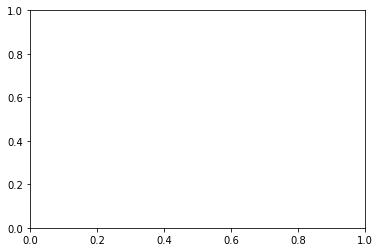

In [235]:
import seaborn as sns

df = df_all
sns.distplot(df.Fare)

In [236]:
pd.qcut(df['Fare'], 13)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

In [237]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(19, 7))
sns.countplot(pd.qcut(df['Fare'], 13), hue=df.Survived)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

<Figure size 1368x504 with 0 Axes>

In [238]:
# Fare is extremely skewed and survival rate on the right end is very high

In [239]:
df['Fare'] = pd.qcut(df.Fare, 13)
df['Age'] = pd.qcut(df.Age, 10)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

<AxesSubplot:xlabel='Age', ylabel='count'>

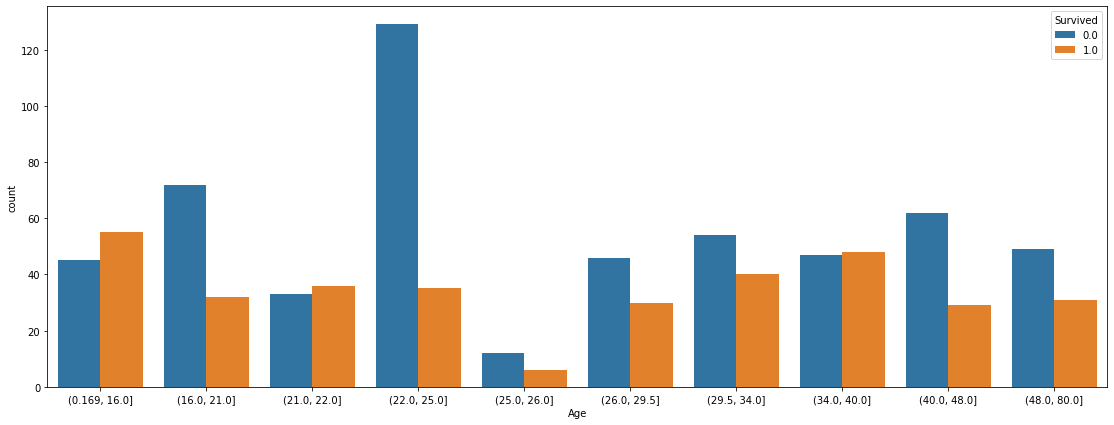

In [240]:
plt.figure(figsize=(19, 7))
sns.countplot(df['Age'], hue=df.Survived)

In [241]:
df['fam_freq'] = df['SibSp'] + df['Parch'] + 1

In [242]:
df.fam_freq.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: fam_freq, dtype: int64

<AxesSubplot:xlabel='fam_freq', ylabel='count'>

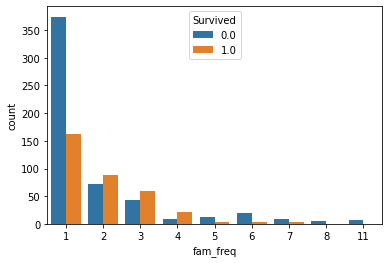

In [243]:
df = df_all
sns.countplot(df.fam_freq, hue=df.Survived)

In [244]:
# Looking at the plot, we can split into groups of :
# 1
# 2, 3, 4
# 5, 6, 7
# 8+

In [245]:
df['Ticket'].value_counts()

CA. 2343      11
CA 2144        8
1601           8
347077         7
PC 17608       7
              ..
7546           1
27267          1
2667           1
350046         1
C.A. 29566     1
Name: Ticket, Length: 929, dtype: int64

In [246]:
pd.cut(df['fam_freq'], bins=[0, 1, 4, 7, np.inf]).value_counts()

(0.0, 1.0]    790
(1.0, 4.0]    437
(4.0, 7.0]     63
(7.0, inf]     19
Name: fam_freq, dtype: int64

In [247]:
df['fam_freq'] = pd.cut(df['fam_freq'], bins=[0, 1, 4, 7, np.inf])

In [248]:
df

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,fam_freq
0,"(21.0, 22.0]",S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(1.0, 4.0]"
1,"(34.0, 40.0]",C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(1.0, 4.0]"
2,"(25.0, 26.0]",S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(0.0, 1.0]"
3,"(34.0, 40.0]",S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(1.0, 4.0]"
4,"(34.0, 40.0]",S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",S,"(7.896, 8.05]","Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236,"(0.0, 1.0]"
1305,"(34.0, 40.0]",C,"(83.475, 512.329]","Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,"(0.0, 1.0]"
1306,"(34.0, 40.0]",S,"(-0.001, 7.25]","Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262,"(0.0, 1.0]"
1307,"(22.0, 25.0]",S,"(7.896, 8.05]","Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309,"(0.0, 1.0]"


In [249]:
df.head()


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,fam_freq
0,"(21.0, 22.0]",S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,"(1.0, 4.0]"
1,"(34.0, 40.0]",C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,"(1.0, 4.0]"
2,"(25.0, 26.0]",S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,"(0.0, 1.0]"
3,"(34.0, 40.0]",S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,"(1.0, 4.0]"
4,"(34.0, 40.0]",S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,"(0.0, 1.0]"


In [250]:
df = df.drop(['Name', 'PassengerId', 'Parch', 'SibSp', 'Ticket'], axis=1)

In [251]:
df

,Age,Embarked,Fare,Pclass,Sex,Survived,fam_freq
0,"(21.0, 22.0]",S,"(-0.001, 7.25]",3,male,0.0,"(1.0, 4.0]"
1,"(34.0, 40.0]",C,"(56.496, 83.475]",1,female,1.0,"(1.0, 4.0]"
2,"(25.0, 26.0]",S,"(7.896, 8.05]",3,female,1.0,"(0.0, 1.0]"
3,"(34.0, 40.0]",S,"(34.075, 56.496]",1,female,1.0,"(1.0, 4.0]"
4,"(34.0, 40.0]",S,"(7.896, 8.05]",3,male,0.0,"(0.0, 1.0]"
...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,NaN,"(0.0, 1.0]"
1305,"(34.0, 40.0]",C,"(83.475, 512.329]",1,female,NaN,"(0.0, 1.0]"
1306,"(34.0, 40.0]",S,"(-0.001, 7.25]",3,male,NaN,"(0.0, 1.0]"
1307,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,NaN,"(0.0, 1.0]"


In [270]:
# One hot encoding for categorical features

cat_features = ['Sex', 'Pclass', 'Embarked']
df_train = df[:891]
df_test = df[891: ]
dfs = [df_train, df_test]




    
for feature in cat_features:
    e = OneHotEncoder(drop='first')
    t = e.fit_transform(pd.DataFrame(df_train[feature].values.reshape(-1, 1))).toarray()
    cols = np.array(e.categories_)[0][:-1]
    
    encoded_df_train = pd.DataFrame(t, columns=cols)
    encoded_df_test = pd.DataFrame(e.transform(pd.DataFrame(df_test[feature].values.reshape(-1, 1))).toarray(), columns=cols)
    encoded_df_train.index = df_train.index
    encoded_df_test.index = df_test.index
    
    df_train = pd.concat([df_train, encoded_df_train], axis=1)
        
    df_test = pd.concat([df_test, encoded_df_test], axis=1)
        
    

In [269]:
from sklearn.preprocessing import OneHotEncoder

e = OneHotEncoder(drop='first')
t = e.fit_transform(pd.DataFrame(df['Pclass'].values.reshape(-1, 1))).toarray() 
print(np.array(e.categories_)[0][:-1])
cols = np.array(e.categories_)[0][:-1]

encoded_df = pd.DataFrame(t, columns=cols)
encoded_df.index = df.index
encoded_df
pd.concat([encoded_df, df], axis=1)

[1 2]


,1,2,Age,Embarked,Fare,Pclass,Sex,Survived,fam_freq
0,0.0,1.0,"(21.0, 22.0]",S,"(-0.001, 7.25]",3,male,0.0,"(1.0, 4.0]"
1,0.0,0.0,"(34.0, 40.0]",C,"(56.496, 83.475]",1,female,1.0,"(1.0, 4.0]"
2,0.0,1.0,"(25.0, 26.0]",S,"(7.896, 8.05]",3,female,1.0,"(0.0, 1.0]"
3,0.0,0.0,"(34.0, 40.0]",S,"(34.075, 56.496]",1,female,1.0,"(1.0, 4.0]"
4,0.0,1.0,"(34.0, 40.0]",S,"(7.896, 8.05]",3,male,0.0,"(0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,NaN,"(0.0, 1.0]"
1305,0.0,0.0,"(34.0, 40.0]",C,"(83.475, 512.329]",1,female,NaN,"(0.0, 1.0]"
1306,0.0,1.0,"(34.0, 40.0]",S,"(-0.001, 7.25]",3,male,NaN,"(0.0, 1.0]"
1307,0.0,1.0,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,NaN,"(0.0, 1.0]"


In [271]:
df_train = df_train.drop(cat_features, axis=1)
df_train

,Age,Fare,Survived,fam_freq,female,1,2,C,Q
0,"(21.0, 22.0]","(-0.001, 7.25]",0.0,"(1.0, 4.0]",1.0,0.0,1.0,0.0,1.0
1,"(34.0, 40.0]","(56.496, 83.475]",1.0,"(1.0, 4.0]",0.0,0.0,0.0,0.0,0.0
2,"(25.0, 26.0]","(7.896, 8.05]",1.0,"(0.0, 1.0]",0.0,0.0,1.0,0.0,1.0
3,"(34.0, 40.0]","(34.075, 56.496]",1.0,"(1.0, 4.0]",0.0,0.0,0.0,0.0,1.0
4,"(34.0, 40.0]","(7.896, 8.05]",0.0,"(0.0, 1.0]",1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,"(26.0, 29.5]","(10.5, 13.0]",0.0,"(0.0, 1.0]",1.0,1.0,0.0,0.0,1.0
887,"(16.0, 21.0]","(26.55, 34.075]",1.0,"(0.0, 1.0]",0.0,0.0,0.0,0.0,1.0
888,"(21.0, 22.0]","(23.25, 26.55]",0.0,"(1.0, 4.0]",0.0,0.0,1.0,0.0,1.0
889,"(25.0, 26.0]","(26.55, 34.075]",1.0,"(0.0, 1.0]",1.0,0.0,0.0,0.0,0.0


In [272]:
df_test.drop('Survived', axis=1)

,Age,Embarked,Fare,Pclass,Sex,fam_freq,female,1,2,C,Q
891,"(34.0, 40.0]",Q,"(7.75, 7.896]",3,male,"(0.0, 1.0]",1.0,0.0,1.0,1.0,0.0
892,"(40.0, 48.0]",S,"(-0.001, 7.25]",3,female,"(1.0, 4.0]",0.0,0.0,1.0,0.0,1.0
893,"(48.0, 80.0]",Q,"(8.05, 10.5]",2,male,"(0.0, 1.0]",1.0,1.0,0.0,1.0,0.0
894,"(26.0, 29.5]",S,"(8.05, 10.5]",3,male,"(0.0, 1.0]",1.0,0.0,1.0,0.0,1.0
895,"(21.0, 22.0]",S,"(10.5, 13.0]",3,female,"(1.0, 4.0]",0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,"(0.0, 1.0]",1.0,0.0,1.0,0.0,1.0
1305,"(34.0, 40.0]",C,"(83.475, 512.329]",1,female,"(0.0, 1.0]",0.0,0.0,0.0,0.0,0.0
1306,"(34.0, 40.0]",S,"(-0.001, 7.25]",3,male,"(0.0, 1.0]",1.0,0.0,1.0,0.0,1.0
1307,"(22.0, 25.0]",S,"(7.896, 8.05]",3,male,"(0.0, 1.0]",1.0,0.0,1.0,0.0,1.0


In [273]:
non_cat_features = ['Age', 'Fare', 'fam_freq']

# Finally, the non-numeric type features are label encoded and categorical features 
# are one-hot encoded.

In [274]:
from sklearn.preprocessing import LabelEncoder

for feat in non_cat_features:
        le = LabelEncoder()
        df_train[feat] = le.fit_transform(df_train[feat])
        df_test[feat] = le.transform(df_test[feat])

In [275]:
df_test = df_test.drop(cat_features, axis=1)

In [276]:
df_test.drop('Survived', axis=1, inplace=True)
df_test

,Age,Fare,fam_freq,female,1,2,C,Q
891,7,2,0,1.0,0.0,1.0,1.0,0.0
892,8,0,1,0.0,0.0,1.0,0.0,1.0
893,9,4,0,1.0,1.0,0.0,1.0,0.0
894,5,4,0,1.0,0.0,1.0,0.0,1.0
895,2,5,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1304,3,3,0,1.0,0.0,1.0,0.0,1.0
1305,7,12,0,0.0,0.0,0.0,0.0,0.0
1306,7,0,0,1.0,0.0,1.0,0.0,1.0
1307,3,3,0,1.0,0.0,1.0,0.0,1.0


In [277]:
df_train

,Age,Fare,Survived,fam_freq,female,1,2,C,Q
0,2,0,0.0,1,1.0,0.0,1.0,0.0,1.0
1,7,11,1.0,1,0.0,0.0,0.0,0.0,0.0
2,4,3,1.0,0,0.0,0.0,1.0,0.0,1.0
3,7,10,1.0,1,0.0,0.0,0.0,0.0,1.0
4,7,3,0.0,0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,5,5,0.0,0,1.0,1.0,0.0,0.0,1.0
887,1,9,1.0,0,0.0,0.0,0.0,0.0,1.0
888,2,8,0.0,1,0.0,0.0,1.0,0.0,1.0
889,4,9,1.0,0,1.0,0.0,0.0,0.0,0.0


In [278]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1),
                                                   df_train.Survived)

In [279]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [280]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV


In [330]:
model_params = {
    
    'random_forest': {
        'model' : RandomForestClassifier(criterion='entropy'),
        'params' : {
            'max_depth' : [3, 4, 5, 6],
            'n_estimators':[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
        }
    }
    
    #'gradient_boost': {
    #    'model' : GradientBoostingClassifier(),
    #    'params' : {
    #        'n_estimators':[ 50, 100, 150, 80],
    #        'max_depth':[3, 5, 8]
    #    }
    #},
    #'catboost' :{
    #    'model': CatBoostClassifier(),
    #    'params': {
    #        'n_estimators':[ 50, 100, 150, 80]
    #    }
    #}
    
}

In [331]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,
                            )
    clf.fit(df_train.drop('Survived', axis=1), df_train.Survived)
    scores.append({
        'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [332]:
pd.DataFrame(scores)

,model,best_score,best_params
0,random_forest,0.830532,"{'max_depth': 4, 'n_estimators': 40}"


In [290]:


clf = GridSearchCV(GradientBoostingClassifier(), {
    'learning_rate' : [0.01, 0.03, 0.1, 0.3, 1],
    'n_estimators': [100, 500, 1000, 2000, 5000],
    'max_depth' : [5, 10, 15]
}, cv=5, return_train_score=False)
clf.fit(df_train.drop('Survived', axis=1), df_train.Survived)
print({'model' : model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})


KeyboardInterrupt: 

In [341]:
model = RandomForestClassifier(max_depth=4, n_estimators=40)
model.fit(df_train.drop('Survived', axis=1), df_train.Survived)

preds = model.predict(df_test)
preds.shape

(418,)

In [334]:
preds = pd.Series(preds)

In [335]:
t = pd.read_csv('test.csv')
t

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [336]:
final = pd.concat([t['PassengerId'], preds], axis=1)
final.columns = ['PassengerId', 'Survived']
final

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [337]:
final.to_csv('final_RandomForest_2.csv', index=False)

In [338]:
df_train

,Age,Fare,Survived,fam_freq,female,1,2,C,Q
0,2,0,0.0,1,1.0,0.0,1.0,0.0,1.0
1,7,11,1.0,1,0.0,0.0,0.0,0.0,0.0
2,4,3,1.0,0,0.0,0.0,1.0,0.0,1.0
3,7,10,1.0,1,0.0,0.0,0.0,0.0,1.0
4,7,3,0.0,0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,5,5,0.0,0,1.0,1.0,0.0,0.0,1.0
887,1,9,1.0,0,0.0,0.0,0.0,0.0,1.0
888,2,8,0.0,1,0.0,0.0,1.0,0.0,1.0
889,4,9,1.0,0,1.0,0.0,0.0,0.0,0.0


In [339]:
df_train.to_csv('processed_train.csv')
df_test.to_csv('processed_test.csv')